In [149]:
import IPython.display as ipd
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

#The package name is called "thinkx"
import thinkdsp
import thinkplot

from scipy.stats import kurtosis, skew

import statistics

% pylab inline
import os
import pandas as pd
import librosa
from librosa import display
import glob 

import scipy
from scipy.signal import hann
from scipy.fftpack import rfft


from __future__ import print_function, division

#Librairy to use 
#Librosa
#Think DSP - Green Tea Press
#pyAudioAnalysis 0.1.3

Populating the interactive namespace from numpy and matplotlib


In [6]:
ipd.Audio('/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/1snoke-20120412-hge/wav/a0405.wav')

## Audio data exploring

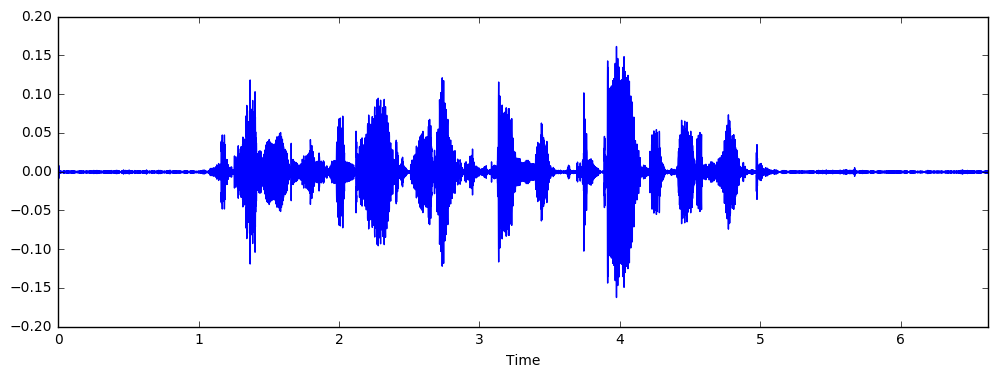

In [15]:
#First vizualization
data, sampling_rate = librosa.load('/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/1snoke-20120412-hge/wav/a0405.wav')

plt.figure(figsize=(12, 4))
librosa.display.waveplot(data, sr=sampling_rate)

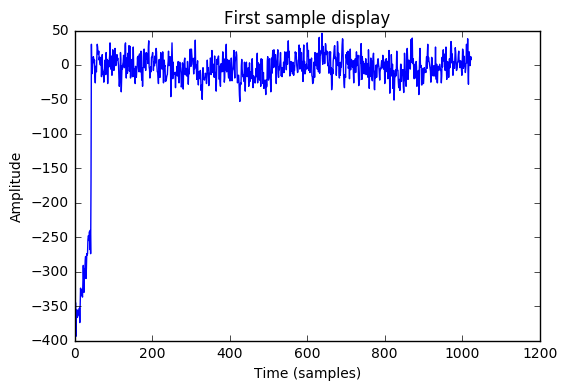

In [9]:
# read audio samples
wave = read("/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/1snoke-20120412-hge/wav/a0405.wav")
audio = wave[1]

# plot only the first 1024 samples
plt.plot(audio[0:1024])

# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time (samples)")

# set the title
plt.title("First sample display")

# display the plot
plt.show()

## Extracting main features

* Mean frequency (in kHz) 
* Standard deviation of frequency
* Median frequency (in kHz) 
* First quantile (in kHz) 
* Third quantile (in kHz) 
* Inter-quantile range (in kHz) 
* Skewness 
* Kurtosis 
* Mode frequency 
* Peak frequency

In [125]:
wave = thinkdsp.read_wave('/Users/kevenlemoing/Sites/sandvik_code_assignement/data/downloads/abc-20091120-mfr/wav/a0066.wav')

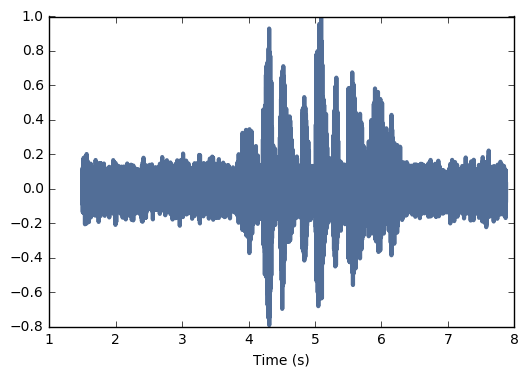

In [140]:
#I pulled out a segment of this recording where the pitch is constant. 
#When we plot the segment, we can't see the waveform clearly, but we can see 
#the "envelope", which tracks the change in amplitude during the segment.

start = 1.5
duration = 10
segment = wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

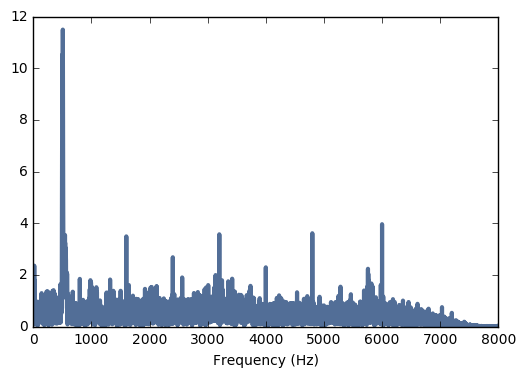

In [126]:
#Let's display the spectrum of our record
spectrum = segment.make_spectrum()
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')

In [127]:
#The function "peaks" prints the highest points in the spectrum and their frequencies, in descending order:
spectrum.peaks()[:10]

[(11.492523757480145, 507.5),
 (11.072982995828157, 508.75),
 (10.5233106490168, 498.75),
 (10.521946235697609, 506.25),
 (10.434310364660369, 500.0),
 (9.6707074021330595, 497.5),
 (9.4911590538820931, 510.0),
 (9.2301683240073924, 501.25),
 (9.0273393061149942, 505.0),
 (8.86589745700803, 502.5)]

In [128]:
len(spectrum.peaks())

6401

In [129]:
#Getting frequencies of the signal
freq = []

for i in range (len(spectrum.peaks())):
    freq.append(spectrum.peaks()[i][1])

freq[:10]

[507.5, 508.75, 498.75, 506.25, 500.0, 497.5, 510.0, 501.25, 505.0, 502.5]

In [130]:
#Mean frequency
mean(freq)

4000.0

In [131]:
#Standard deviation of frequency
std(freq)

2309.7618924902195

In [132]:
#Median frequency
median(freq)

4000.0

In [136]:
#First quantile
d = {'frequency':freq}

freq_df = pd.DataFrame(d)
freq_df.quantile(0.1)

frequency    800.0
dtype: float64

In [137]:
#Third quantile
freq_df.quantile(0.3)

frequency    2400.0
dtype: float64

In [138]:
#Inter quantile range
q75, q25 = np.percentile(freq, [75 ,25])
iqr = q75 - q25
iqr

4000.0

In [143]:
#Kurtosis
kurtosis(freq)

-1.2000000585754458

In [144]:
#Skewness (skewness of normal distribution should be 0)
skew(freq)

0.0

In [151]:
#Mode frequency
statistics.mode(freq)

StatisticsError: no unique mode; found 6401 equally common values

## Additional features

** Time domain feature **

* RMSE
* WaveForm

** Frequency domain feature **

* Amplitude of individuals frequency

** Perceptual features **

* MFCC

** Windowing features **

* Hamming distances of winfows

In [ ]:
#RMSE

In [38]:
#WaveForm

In [39]:
#Amplitude of individuals frequency

In [40]:
#MFCC
#X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
#mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 

In [41]:
#Hamming distances of winfows